# Example CIFAR100 Demo

## (i) Import libraries

In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt

import visualization

## (ii) Plot classification accuracy
The dotted lines correspond to the epoch number at which the refinement phase started. 

['/media/hongyu/SSD/SSDUBUNTU/WUSL/SubspaceLearningMachine_SoftTree/experiments/cifar100/mbv2/run0/checkpoints/records.pkl', '/media/hongyu/SSD/SSDUBUNTU/WUSL/SubspaceLearningMachine_SoftTree/experiments/cifar100/mbv2/run0_widthmult_1.0/checkpoints/records.pkl', '/media/hongyu/SSD/SSDUBUNTU/WUSL/SubspaceLearningMachine_SoftTree/experiments/cifar100/mbv2/run0_widthmult_2.0_expansion_8_fixedConv/checkpoints/records.pkl']
['/media/hongyu/SSD/SSDUBUNTU/WUSL/SubspaceLearningMachine_SoftTree/experiments/cifar100/mbv2/run0/checkpoints/model.pth', '/media/hongyu/SSD/SSDUBUNTU/WUSL/SubspaceLearningMachine_SoftTree/experiments/cifar100/mbv2/run0_widthmult_1.0/checkpoints/model.pth', '/media/hongyu/SSD/SSDUBUNTU/WUSL/SubspaceLearningMachine_SoftTree/experiments/cifar100/mbv2/run0_widthmult_2.0_expansion_8_fixedConv/checkpoints/model.pth']


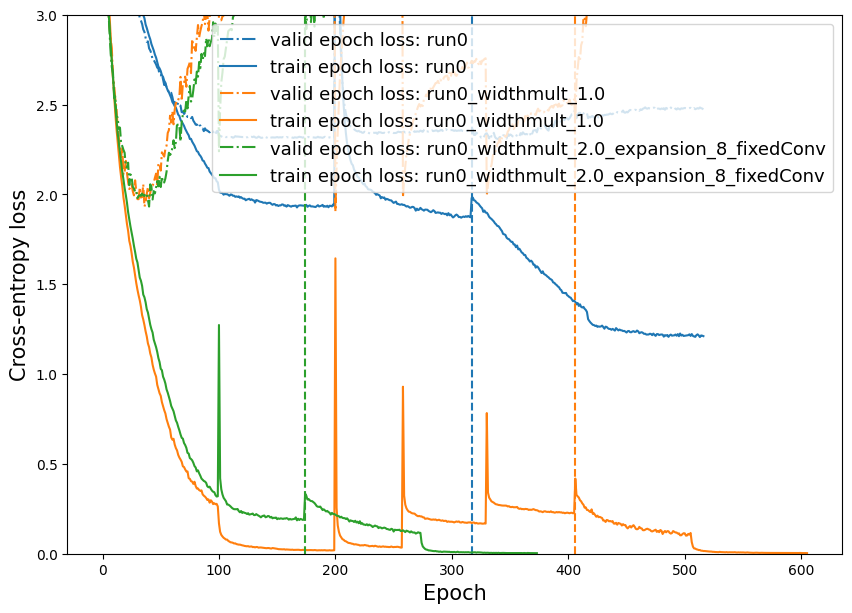

run0: test accuracy = 44.66999816894531
run0_widthmult_1.0: test accuracy = 56.38999938964844
run0_widthmult_2.0_expansion_8_fixedConv: test accuracy = 55.75


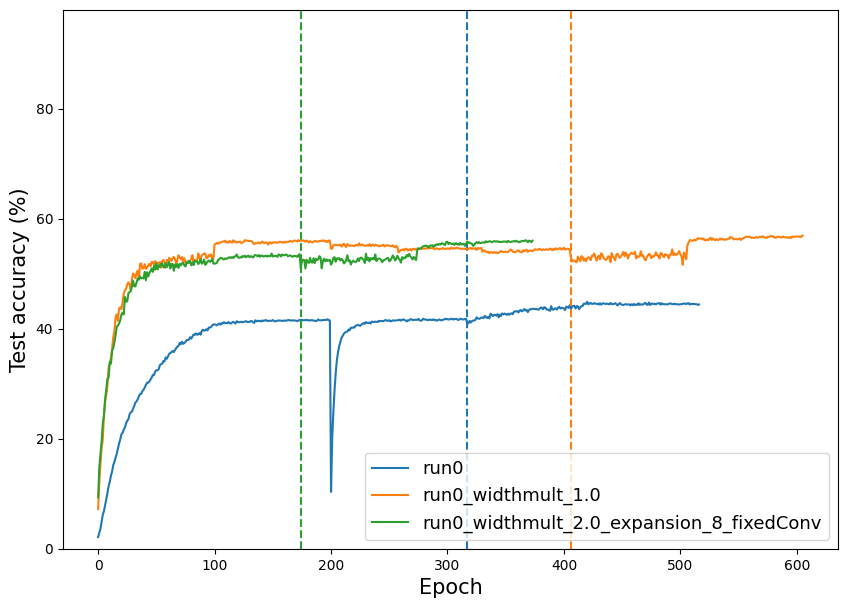

In [7]:
%matplotlib inline

exp_dir = '/media/hongyu/SSD/SSDUBUNTU/WUSL/SubspaceLearningMachine_SoftTree/experiments/cifar100/mbv2/'
# models_list = ["debug"]
models_list = ["run0", 'run0_widthmult_1.0', 'run0_widthmult_2.0_expansion_8_fixedConv']
# models_list = ['run0_widthmult_2.0_expansion_8_fixedConv']

records_file_list = [exp_dir + model_name + '/checkpoints/records.pkl' for model_name in models_list]
model_files = [exp_dir + model_name + '/checkpoints/model.pth' for model_name in models_list]

print(records_file_list)
print(model_files)

visualization.plot_performance(records_file_list, models_list, ymax = 3.0, figsize=(10,7), finetune_position=True)
visualization.plot_accuracy(records_file_list, models_list, figsize=(10,7), ymin=0, ymax=98, finetune_position=True)

## (iii) Compute model size

In [4]:
_ = visualization.compute_number_of_params(model_files, models_list, is_gpu=False)


Model: run0_widthmult_2.0_expansion_8_fixedConv
Number of parameters summary:
    Total: 9346665 
    Max per branch: 9346665 
    Min per branch: 9346665 
    Average per branch: 9346665.0


In [6]:
from models import Tree
from utils import load_tree_model
import ptflops

# model_path = "/media/hongyu/SSD/SSDUBUNTU/WUSL/SubspaceLearningMachine_SoftTree/experiments/cifar100/mbv2/run0/checkpoints/model.pth"
# model_path = "/media/hongyu/SSD/SSDUBUNTU/WUSL/SubspaceLearningMachine_SoftTree/experiments/cifar100/mbv2/run0_widthmult_1.0/checkpoints/model.pth"
model_path = '/media/hongyu/SSD/SSDUBUNTU/WUSL/SubspaceLearningMachine_SoftTree/experiments/cifar100/mbv2/run0_widthmult_2.0_expansion_8_fixedConv/checkpoints/model.pth'
model = load_tree_model(model_path)



flops, params = ptflops.get_model_complexity_info(model, (3, 32, 32), as_strings=True, print_per_layer_stat=True)
print('Flops:  ' + flops)
print('Params: ' + params)

Tree(
  9.55 M, 100.000% Params, 25.54 MMac, 100.000% MACs, 
  (tree_modules): ModuleList(
    9.55 M, 100.000% Params, 25.54 MMac, 100.000% MACs, 
    (0): Sequential(
      9.55 M, 100.000% Params, 25.54 MMac, 100.000% MACs, 
      (transform): Root_MBV2(
        9.11 M, 95.352% Params, 25.31 MMac, 99.068% MACs, 
        (features): Sequential(
          9.11 M, 95.352% Params, 25.31 MMac, 99.068% MACs, 
          (0): Sequential(
            928, 0.010% Params, 245.76 KMac, 0.962% MACs, 
            (0): Conv2d(864, 0.009% Params, 221.18 KMac, 0.866% MACs, 3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
            (1): BatchNorm2d(64, 0.001% Params, 16.38 KMac, 0.064% MACs, 32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(0, 0.000% Params, 8.19 KMac, 0.032% MACs, inplace=True)
          )
          (1): InvertedResidual(
            896, 0.009% Params, 237.57 KMac, 0.930% MACs, 
            (conv): Sequential(
        

/media/hongyu/SSD/SSDUBUNTU/WUSL/SubspaceLearningMachine_SoftTree/examples/../models.py:1810: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
